list for the ratio of M and m for different values of n is: [3.7735303542358802, 2.4756782646439817, 2.1996574080542146, 2.104550733662537, 1.9230435799957042, 1.9820686097097704, 1.9050981880739697, 1.886712132783103, 1.9347970217939734, 1.9153124837757034]
list for the ratio of M and m for different values of n is: [3.7744155419809533, 2.439710917719791, 2.4279143761841784, 2.1881802584039773, 2.1681480289417734, 2.098984447586716, 2.2094571725474403, 2.1481509423250147, 2.181491235463017, 1.9978805644800082]
list for the ratio of M and m for different values of n is: [3.6944096166968556, 2.1361986468255085, 2.1834608128955355, 2.1183190949572173, 1.776282454136794, 2.0714252137555085, 2.070445294671884, 1.9651893876322335, 1.9262939252821936, 1.8839900812860386]
list for the ratio of M and m for different values of n is: [3.6107323363769726, 2.501965983932317, 2.134716854202473, 1.948634417236323, 2.2160539718844774, 2.127570886174254, 2.056319992180873, 1.9821470736557683, 2.030347

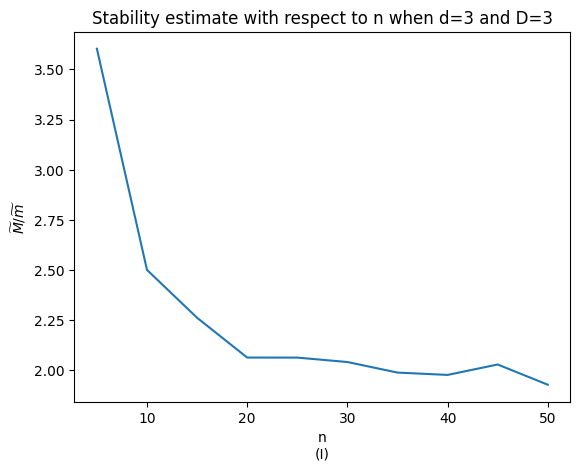

In [ ]:
import numpy as np
import scipy
from scipy import optimize
from numpy import *
from numpy import trace
from numpy import linalg as LA
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
ratio_seed=[]
np.random.seed(0)
#for Seed in [1,2,3,4,5,6]:
for Seed in [1,2,3,4,5,67,8,9,10]:
  ratio = []
  def check(D):
      # n=10  #n=3,10
      # d=20   #d=10,20
      exp_num = 1000     #original exp no 10
      calculate = []

      def repeat(A):
          # print('A first coordinate',A[0,0])

          def find(Xi, A):
              Z = np.dot(A, Xi)
              Yi = np.sort(Z, axis=1)
              return (Yi)

          X1 = np.random.normal(size=(d, n))
          Y1 = find(X1, A)
          # print('matrix X1 is:',X1,'for the matrix A Sort (AX1)=Y1 which is:',Y1)
          X2 = np.random.normal(size=(d, n))      # X2=np.random.permutation(np.transpose(X1)). # X2=np.transpose(X2)


          Y2 = find(X2, A)
          # print('matrix X2 is:',X2,'and for the matrix A Sort (AX2)=Y2 which is:',Y2)

          # print('Y1-Y2 is:',np.subtract(Y1,Y2),'Frobenious norm of Y1-Y2 is:',LA.norm(np.subtract(Y1,Y2), 'fro'))
          F = LA.norm(np.subtract(Y1, Y2), 'fro')
          # print('Frobenious norm of Y1-Y2 is:',F)     # we can also use N=LA.norm(Z), both are same

          def dist(X1, X2):
              # print('X1 is:', X1)

              # print('X2 is:', X2)

              X3 = np.transpose(X1)
              # print('transpose of X1 is:',X3)
              M1 = np.dot(X3, X2)  # this part is for denominator
              # print('X3*X2 is:',M)
              Mt = np.transpose(M1)
              # print('transpose of M is:',Mt)

              I, F = scipy.optimize.linear_sum_assignment(Mt, maximize=True)
              # print('Required permutation matrics (with row and column indices) is :',I,F)
              permutation_matrix = csr_matrix(
                  (np.ones(n, dtype=int), (F, I)), shape=(n, n))
              P = permutation_matrix.todense()
              # print(P)
              # A=np.dot(X1,P)
              # print('A is:',A)
              X1_s = LA.norm(X1)
              R = X1_s*X1_s
              X2_s = LA.norm(X2)
              S = X2_s*X2_s
              T1 = np.dot(P, Mt)
              T = matrix.trace(T1)
              # print(T)
              D2 = R+S-2*T
              D2 = np.abs(D2)
              L = sqrt(D2)
              # print(D)
              # print('d(X1,X2), distance between X1 and X2 is:',D)
              return L
          L = dist(X1, X2)

          def lipschitz(F, L):

              Mi = float(F/L)       # print('Lipschitz constant =',Mi)
              calculate.append(Mi)
          lipschitz(F, L)
      calculate = []

      np.random.seed(Seed)
      A = np.random.normal(size=(D, d))
      for i in range(exp_num):

          repeat(A)

      # print(calculate)
      M = max(calculate)
      m = min(calculate)
      F = M/m
      # print('Maximum is M:',M)
      # print('Minimum is m:',m)
      # print(F)
      ratio.append(F)


  #X=np.array([100,200,300,400,500,600,700,800,900,1000])
  X=np.array([5,10,15,20,25,30,35,40,45,50])
  for n in X:  # for calculating the ratio of M and m for different values of D.
      D = 3
      d = 3
      check(n)
  print('list for the ratio of M and m for different values of n is:', ratio)
  Y = ratio
  ratio_seed.append(Y)

print('list of ratios corresponding to different seeds and n is:',ratio_seed)
average_ratio = [sum(sub_list) / len(sub_list) for sub_list in zip(*ratio_seed)]
print('list of average ratio is:',average_ratio)
print('list of the values of number of points is:',X)
plt.plot(X,average_ratio)
plt.xlabel('n\n(I)')
plt.ylabel('$\widetilde{M}/\widetilde{m}$')
plt.title(f"Stability estimate with respect to n when d={d} and D={D}")
plt.show()

